In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle
import warnings
warnings.filterwarnings('ignore')

print("📊 Libraries imported successfully!")


📊 Libraries imported successfully!


In [4]:
import os
os.chdir("C:/Users/Inchara/SHOPPER-SPECTRUM")  # ✅ Change this path if your project is elsewhere

rfm_data = pd.read_csv('data/processed/rfm_analysis.csv')

print("=== RFM DATA LOADED ===")
print(f"Shape: {rfm_data.shape}")
print(f"Columns: {list(rfm_data.columns)}")

# Display sample data
print("\nSample RFM Data:")
rfm_data.head(10)

=== RFM DATA LOADED ===
Shape: (4338, 9)
Columns: ['CustomerID', 'LastPurchaseDate', 'Frequency', 'Monetary', 'Recency', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']

Sample RFM Data:


,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,RFM_Score
0,12346,2023-01-18 10:01:00,1,77183.60,325,1,1,5,115
1,12347,2023-12-07 15:52:00,7,4310.00,1,5,5,5,555
2,12348,2023-09-25 13:13:00,4,1797.24,74,2,4,4,244
3,12349,2023-11-21 09:51:00,1,1757.55,18,4,1,4,414
4,12350,2023-02-02 16:01:00,1,334.40,309,1,1,2,112
5,12352,2023-11-03 14:37:00,8,2506.04,35,3,5,5,355
6,12353,2023-05-19 17:47:00,1,89.00,203,1,1,1,111
7,12354,2023-04-21 13:11:00,1,1079.40,231,1,1,4,114
8,12355,2023-05-09 13:49:00,1,459.40,213,1,1,2,112
9,12356,2023-11-17 08:40:00,3,2811.43,22,4,3,5,435


=== 1. RFM DATA PREPARATION ===
RFM Statistics:
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     91.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       0.000000     1.000000       3.750000
25%      17.000000     1.000000     306.482500
50%      50.000000     2.000000     668.570000
75%     141.000000     5.000000    1660.597500
max     373.000000   209.000000  280206.020000

Outlier Analysis:
Recency: 155 outliers (3.6%)
Frequency: 285 outliers (6.6%)
Monetary: 425 outliers (9.8%)

=== 2. FEATURE STANDARDIZATION ===
Standardized RFM Statistics:
       Recency_Scaled  Frequency_Scaled  Monetary_Scaled
count    4.338000e+03      4.338000e+03     4.338000e+03
mean     2.702618e-17      1.801745e-17     1.965540e-17
std      1.000115e+00      1.000115e+00     1.000115e+00
min     -9.153401e-01     -4.250965e-01    -2.276151e-01
25%     -7.453445e-01     -4.250965e-01    -1.939190e-01
50%     -4.15

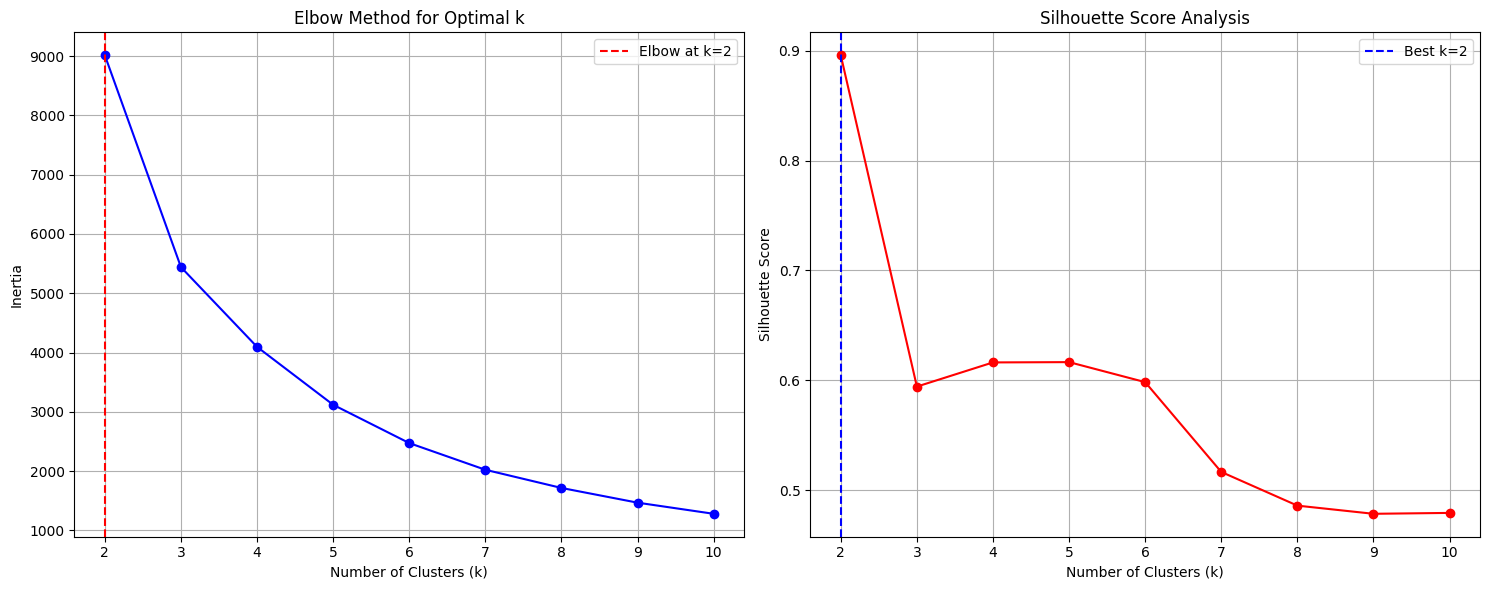


Chosen optimal k = 2

=== 4. K-MEANS CLUSTERING (k=2) ===
Cluster Summary Statistics:
        Recency               Frequency         Monetary          
           mean     std count      mean    std      mean       std
Cluster                                                           
0         92.06  100.09  4312      3.90   4.71   1543.54   3088.54
1          5.04    8.60    26     66.42  49.13  85826.08  70834.06

Cluster Distribution:
Cluster 0: 4312 customers (99.4%)
Cluster 1: 26 customers (0.6%)

=== 5. CLUSTER INTERPRETATION ===
Cluster Interpretation:
         Recency  Frequency  Monetary      Segment_Label
Cluster                                                 
0          92.06       3.90   1543.54  Regular Customers
1           5.04      66.42  85826.08    Loyal Customers

Final Segment Summary:
                  Recency Frequency  Monetary                  
                     mean      mean      mean         sum count
Segment                                            

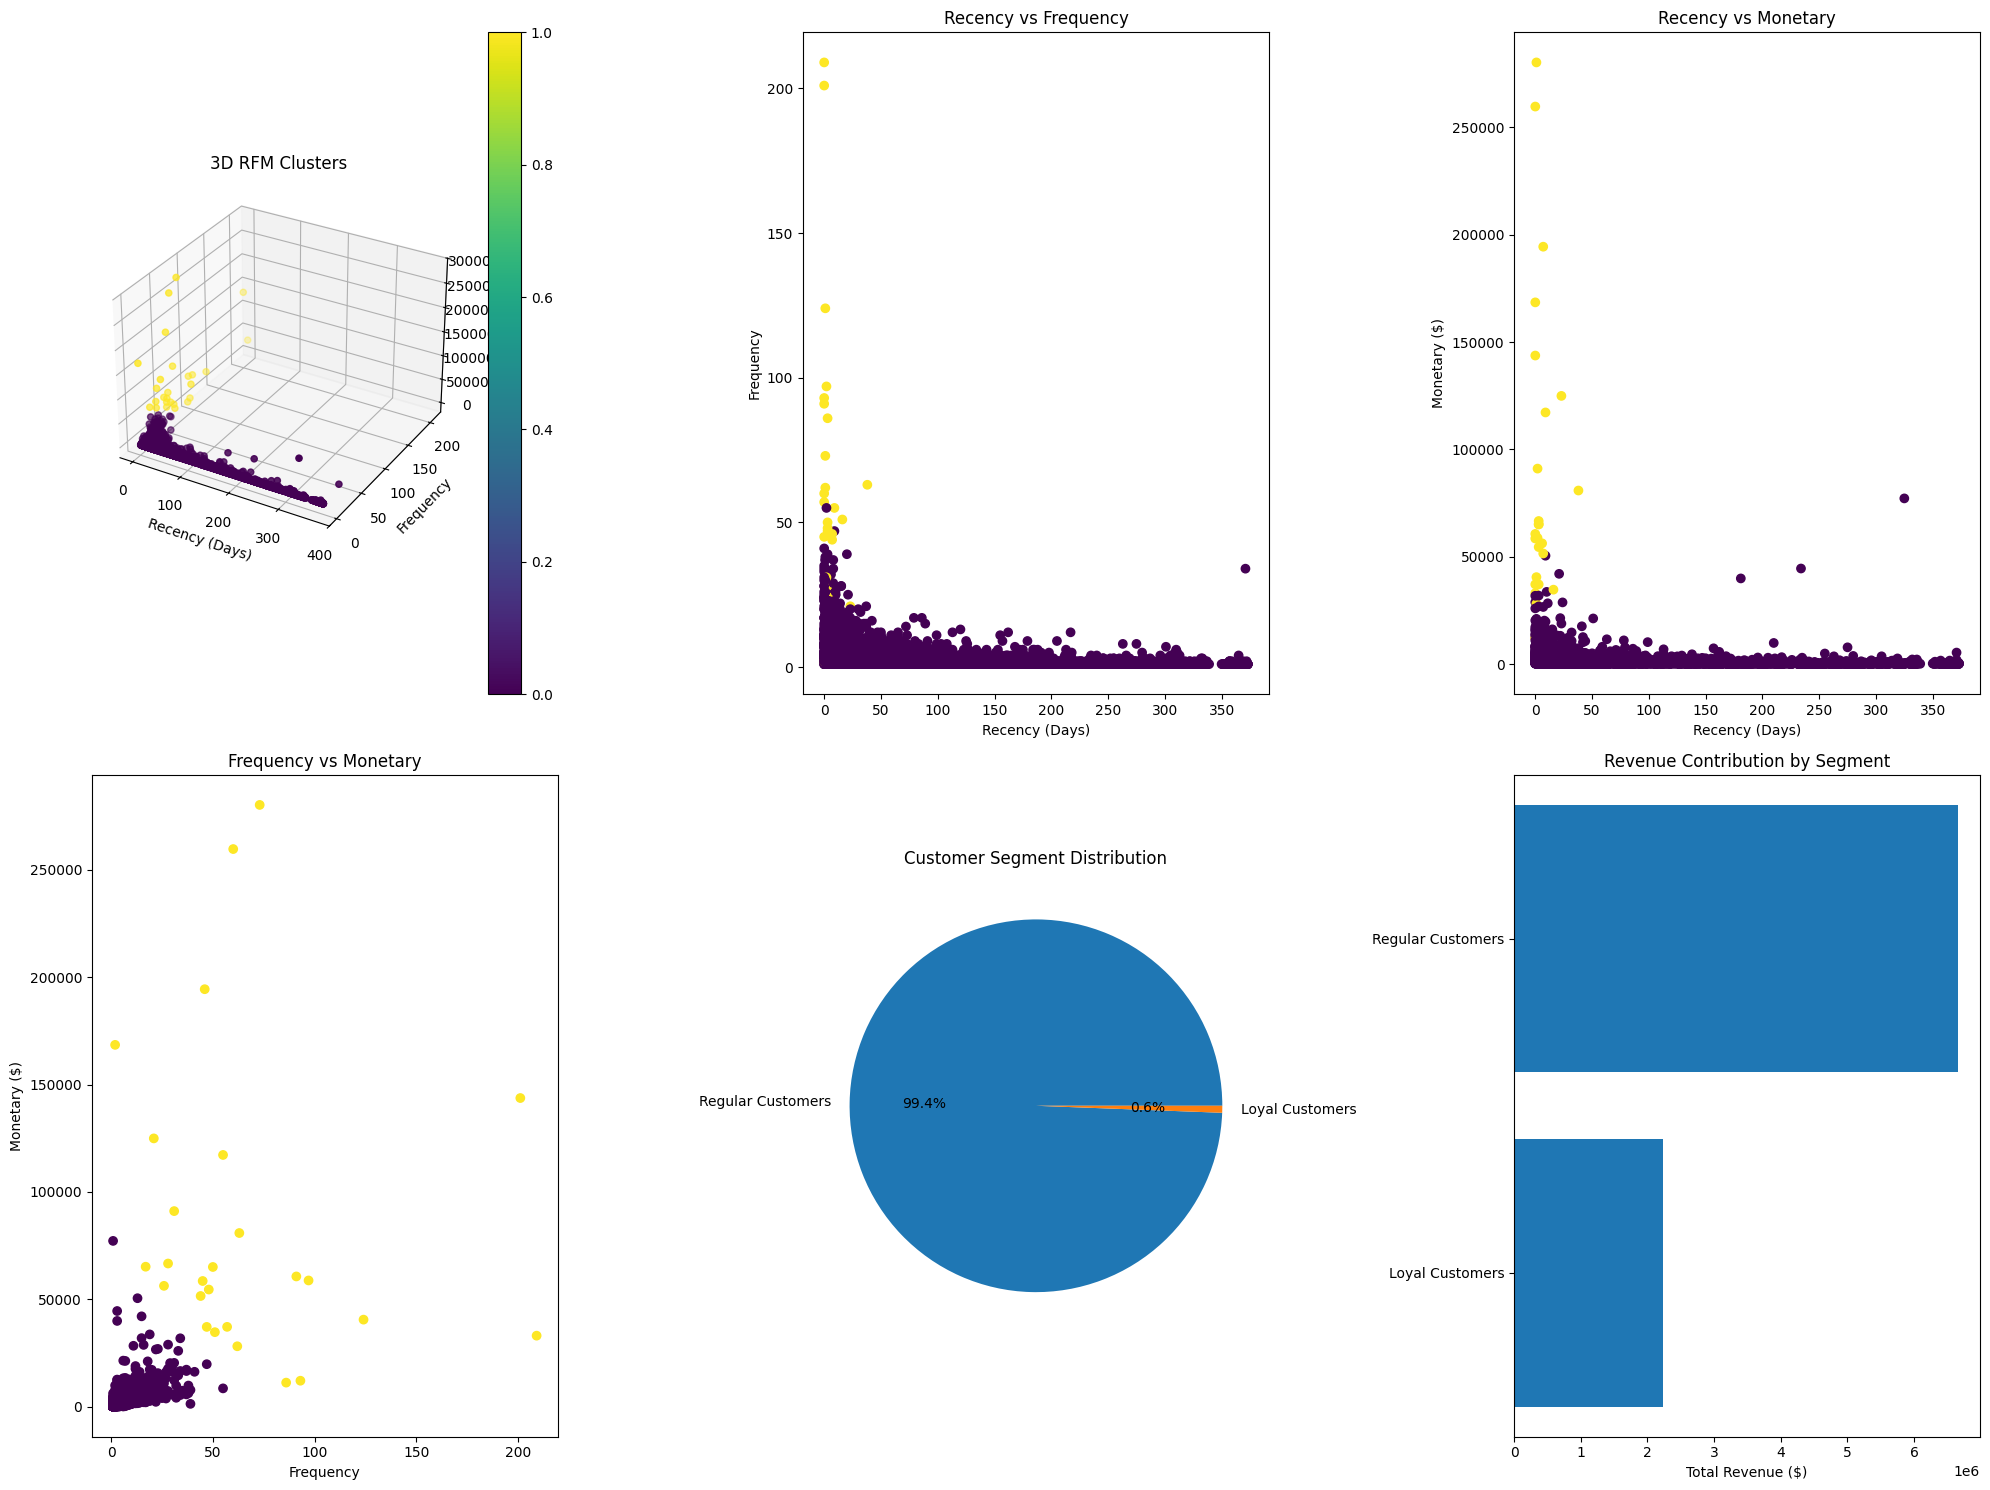


=== 7. PCA ANALYSIS ===
PCA Explained Variance Ratio: [0.55473084 0.30252713]
Total Variance Explained: 0.857


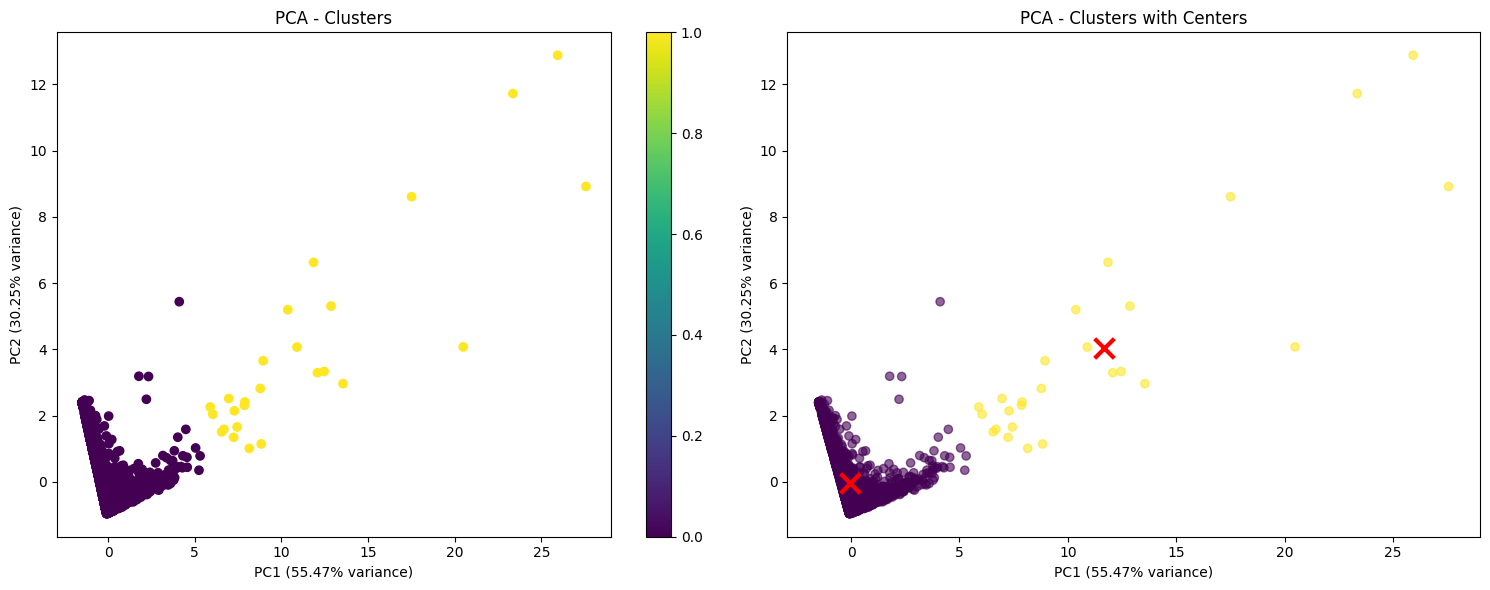


=== 8. BUSINESS INSIGHTS & RECOMMENDATIONS ===
Business Insights by Segment:
                   Avg_Recency  Med_Recency  Avg_Frequency  Med_Frequency  \
Segment                                                                     
Loyal Customers           5.04          2.5          66.42           53.0   
Regular Customers        92.06         50.0           3.90            2.0   

                   Avg_Monetary  Med_Monetary  Total_Revenue  Customer_Count  \
Segment                                                                        
Loyal Customers        85826.08      59697.42     2231478.03              26   
Regular Customers       1543.54        662.56     6655730.86            4312   

                   Revenue_Per_Customer  Revenue_Share_Pct  Customer_Share_Pct  
Segment                                                                         
Loyal Customers            85826.078077               25.1                 0.6  
Regular Customers           1543.536841          

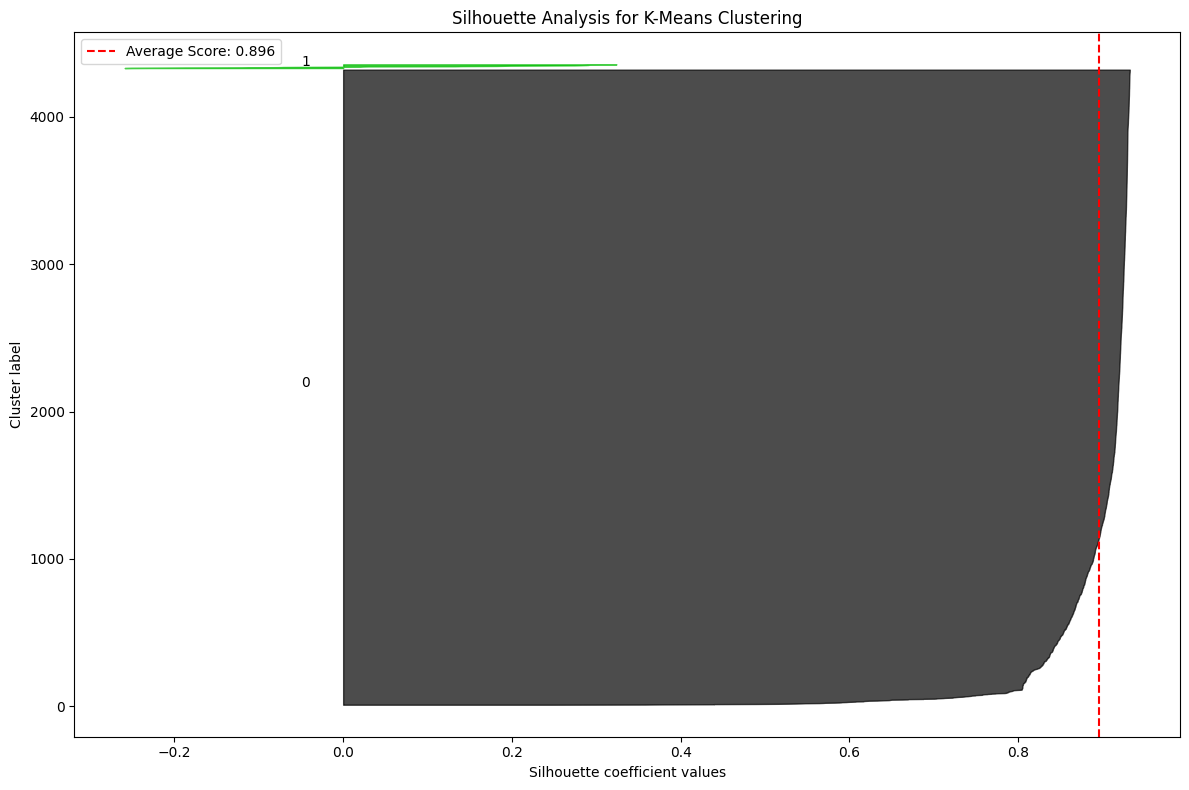


=== 10. SAVING SEGMENTATION MODEL ===
✅ Segmentation model and results saved:
• models/kmeans_model.pkl - Trained K-Means model
• models/scaler.pkl - Feature scaler
• models/cluster_mapping.pkl - Cluster to segment mapping
• data/processed/customer_segments.csv - Customer segmentation results
• data/processed/segment_insights.csv - Business insights by segment
• data/processed/cluster_centers.csv - Cluster centers

🎉 Customer Segmentation completed!
📊 2 customer segments identified with 0.896 silhouette score
🎯 Ready for recommendation system development!


In [5]:
# 1. RFM DATA PREPARATION AND FEATURE ENGINEERING
print("=== 1. RFM DATA PREPARATION ===")

# Select RFM features for clustering
rfm_features = rfm_data[['Recency', 'Frequency', 'Monetary']].copy()

# Basic statistics
print("RFM Statistics:")
print(rfm_features.describe())

# Check for outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (lower_bound, upper_bound)

print(f"\nOutlier Analysis:")
for col in ['Recency', 'Frequency', 'Monetary']:
    outlier_count, bounds = detect_outliers_iqr(rfm_features, col)
    print(f"{col}: {outlier_count} outliers ({outlier_count/len(rfm_features)*100:.1f}%)")

# Handle extreme outliers by capping (optional - use if needed)
# We'll keep outliers as they represent important customer segments (e.g., VIP customers)

# %%
# 2. FEATURE STANDARDIZATION
print("\n=== 2. FEATURE STANDARDIZATION ===")

# Standardize features for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])
rfm_scaled_df.index = rfm_features.index

print("Standardized RFM Statistics:")
print(rfm_scaled_df.describe())

# Verify standardization (mean ≈ 0, std ≈ 1)
print(f"\nStandardization Check:")
for col in rfm_scaled_df.columns:
    mean_val = rfm_scaled_df[col].mean()
    std_val = rfm_scaled_df[col].std()
    print(f"{col}: Mean = {mean_val:.6f}, Std = {std_val:.6f}")

# %%
# 3. DETERMINE OPTIMAL NUMBER OF CLUSTERS
print("\n=== 3. OPTIMAL CLUSTER ANALYSIS ===")

# Test different numbers of clusters
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Testing different numbers of clusters...")
for k in k_range:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette_avg:.3f}")

# Find elbow point (approximate)
def find_elbow_point(inertias):
    # Calculate rate of change
    differences = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
    # Find the point where rate of change decreases most
    elbow_index = differences.index(max(differences[:len(differences)//2])) + 2  # +2 because k starts from 2
    return elbow_index

elbow_k = find_elbow_point(inertias)
best_silhouette_k = k_range[silhouette_scores.index(max(silhouette_scores))]

print(f"\nElbow method suggests k = {elbow_k}")
print(f"Best silhouette score at k = {best_silhouette_k}")

# Visualization of cluster metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
axes[0].plot(k_range, inertias, 'bo-')
axes[0].axvline(x=elbow_k, color='red', linestyle='--', label=f'Elbow at k={elbow_k}')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].legend()
axes[0].grid(True)

# Silhouette scores
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].axvline(x=best_silhouette_k, color='blue', linestyle='--', label=f'Best k={best_silhouette_k}')
axes[1].set_title('Silhouette Score Analysis')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Choose optimal k (balance between elbow and silhouette)
optimal_k = best_silhouette_k  # You can adjust this based on business needs
print(f"\nChosen optimal k = {optimal_k}")

# %%
# 4. APPLY K-MEANS CLUSTERING
print(f"\n=== 4. K-MEANS CLUSTERING (k={optimal_k}) ===")

# Final K-Means model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(rfm_scaled)

# Add cluster labels to original data
rfm_clustered = rfm_features.copy()
rfm_clustered['Cluster'] = cluster_labels

# Calculate cluster statistics
cluster_summary = rfm_clustered.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'count'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
}).round(2)

print("Cluster Summary Statistics:")
print(cluster_summary)

# Calculate cluster percentages
cluster_sizes = rfm_clustered['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_sizes / len(rfm_clustered) * 100).round(1)

print(f"\nCluster Distribution:")
for cluster in range(optimal_k):
    count = cluster_sizes[cluster]
    percentage = cluster_percentages[cluster]
    print(f"Cluster {cluster}: {count} customers ({percentage}%)")

# %%
# 5. CLUSTER INTERPRETATION AND LABELING
print("\n=== 5. CLUSTER INTERPRETATION ===")

# Calculate cluster characteristics for labeling
cluster_characteristics = rfm_clustered.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean'
}).round(2)

# Add percentile ranks for interpretation
for metric in ['Recency', 'Frequency', 'Monetary']:
    cluster_characteristics[f'{metric}_Percentile'] = cluster_characteristics[metric].rank(pct=True)

# Interpret clusters based on RFM percentiles
def interpret_cluster(row):
    r_pct = row['Recency_Percentile']
    f_pct = row['Frequency_Percentile'] 
    m_pct = row['Monetary_Percentile']
    
    # Low recency = recent purchase (good)
    # High frequency = frequent purchases (good)
    # High monetary = high spend (good)
    
    if r_pct <= 0.4 and f_pct >= 0.6 and m_pct >= 0.6:
        return "Champions"  # Best customers
    elif r_pct <= 0.5 and f_pct >= 0.4 and m_pct >= 0.4:
        return "Loyal Customers"  # Regular good customers
    elif r_pct >= 0.6 and f_pct >= 0.6 and m_pct >= 0.6:
        return "Potential Loyalists"  # Good customers who haven't purchased recently
    elif r_pct <= 0.4 and f_pct <= 0.4:
        return "New Customers"  # Recent but low frequency
    elif r_pct >= 0.7 and f_pct <= 0.4:
        return "At Risk"  # Haven't purchased recently, low frequency
    elif r_pct >= 0.5 and m_pct <= 0.4:
        return "Price Sensitive"  # Older customers with low spend
    else:
        return "Regular Customers"  # Middle ground

# Apply interpretation
cluster_characteristics['Segment_Label'] = cluster_characteristics.apply(interpret_cluster, axis=1)

print("Cluster Interpretation:")
print(cluster_characteristics[['Recency', 'Frequency', 'Monetary', 'Segment_Label']])

# Add segment labels to main dataset
segment_mapping = cluster_characteristics['Segment_Label'].to_dict()
rfm_clustered['Segment'] = rfm_clustered['Cluster'].map(segment_mapping)

# Final segment summary
segment_summary = rfm_clustered.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum', 'count']
}).round(2)

print(f"\nFinal Segment Summary:")
print(segment_summary)

# %%
# 6. CLUSTER VISUALIZATION
print("\n=== 6. CLUSTER VISUALIZATION ===")

# 3D scatter plot of RFM clusters
fig = plt.figure(figsize=(20, 15))

# 3D plot
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
scatter = ax1.scatter(rfm_clustered['Recency'], rfm_clustered['Frequency'], 
                     rfm_clustered['Monetary'], c=rfm_clustered['Cluster'], cmap='viridis')
ax1.set_xlabel('Recency (Days)')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Monetary ($)')
ax1.set_title('3D RFM Clusters')
plt.colorbar(scatter, ax=ax1)

# 2D projections
ax2 = fig.add_subplot(2, 3, 2)
scatter2 = ax2.scatter(rfm_clustered['Recency'], rfm_clustered['Frequency'], 
                      c=rfm_clustered['Cluster'], cmap='viridis')
ax2.set_xlabel('Recency (Days)')
ax2.set_ylabel('Frequency')
ax2.set_title('Recency vs Frequency')

ax3 = fig.add_subplot(2, 3, 3)
scatter3 = ax3.scatter(rfm_clustered['Recency'], rfm_clustered['Monetary'], 
                      c=rfm_clustered['Cluster'], cmap='viridis')
ax3.set_xlabel('Recency (Days)')
ax3.set_ylabel('Monetary ($)')
ax3.set_title('Recency vs Monetary')

ax4 = fig.add_subplot(2, 3, 4)
scatter4 = ax4.scatter(rfm_clustered['Frequency'], rfm_clustered['Monetary'], 
                      c=rfm_clustered['Cluster'], cmap='viridis')
ax4.set_xlabel('Frequency')
ax4.set_ylabel('Monetary ($)')
ax4.set_title('Frequency vs Monetary')

# Cluster distribution
ax5 = fig.add_subplot(2, 3, 5)
segment_counts = rfm_clustered['Segment'].value_counts()
ax5.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
ax5.set_title('Customer Segment Distribution')

# Segment value contribution
ax6 = fig.add_subplot(2, 3, 6)
segment_revenue = rfm_clustered.groupby('Segment')['Monetary'].sum().sort_values(ascending=True)
ax6.barh(range(len(segment_revenue)), segment_revenue.values)
ax6.set_yticks(range(len(segment_revenue)))
ax6.set_yticklabels(segment_revenue.index)
ax6.set_xlabel('Total Revenue ($)')
ax6.set_title('Revenue Contribution by Segment')

plt.tight_layout()
plt.show()

# %%
# 7. PCA VISUALIZATION FOR BETTER CLUSTER UNDERSTANDING
print("\n=== 7. PCA ANALYSIS ===")

# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
rfm_pca = pca.fit_transform(rfm_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Segment'] = rfm_clustered['Segment']

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.3f}")

# PCA visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# PCA colored by cluster
scatter1 = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].set_title('PCA - Clusters')
plt.colorbar(scatter1, ax=axes[0])

# PCA with cluster centers
centers_pca = pca.transform(final_kmeans.cluster_centers_)
axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.6)
axes[1].scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].set_title('PCA - Clusters with Centers')

plt.tight_layout()
plt.show()

# %%
# 8. BUSINESS INSIGHTS AND RECOMMENDATIONS
print("\n=== 8. BUSINESS INSIGHTS & RECOMMENDATIONS ===")

# Calculate business metrics for each segment
business_insights = rfm_clustered.groupby('Segment').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'], 
    'Monetary': ['mean', 'median', 'sum'],
    'Cluster': 'count'
}).round(2)

business_insights.columns = ['Avg_Recency', 'Med_Recency', 'Avg_Frequency', 'Med_Frequency',
                           'Avg_Monetary', 'Med_Monetary', 'Total_Revenue', 'Customer_Count']

# Calculate additional metrics
business_insights['Revenue_Per_Customer'] = business_insights['Total_Revenue'] / business_insights['Customer_Count']
business_insights['Revenue_Share_Pct'] = (business_insights['Total_Revenue'] / business_insights['Total_Revenue'].sum() * 100).round(1)
business_insights['Customer_Share_Pct'] = (business_insights['Customer_Count'] / business_insights['Customer_Count'].sum() * 100).round(1)

print("Business Insights by Segment:")
print(business_insights)

# Generate actionable recommendations
recommendations = {}

for segment in business_insights.index:
    avg_recency = business_insights.loc[segment, 'Avg_Recency']
    avg_frequency = business_insights.loc[segment, 'Avg_Frequency'] 
    avg_monetary = business_insights.loc[segment, 'Avg_Monetary']
    customer_count = business_insights.loc[segment, 'Customer_Count']
    
    if segment == 'Champions':
        recommendations[segment] = [
            "Offer exclusive VIP programs and early access to new products",
            "Request referrals and testimonials",
            "Provide premium customer service"
        ]
    elif segment == 'Loyal Customers':
        recommendations[segment] = [
            "Upsell higher value products", 
            "Ask for reviews and feedback",
            "Offer loyalty rewards program"
        ]
    elif segment == 'At Risk':
        recommendations[segment] = [
            "Send personalized win-back campaigns",
            "Offer special discounts and incentives",
            "Conduct surveys to understand issues"
        ]
    elif segment == 'New Customers':
        recommendations[segment] = [
            "Provide onboarding sequence",
            "Offer starter bundles and education",
            "Send welcome series emails"
        ]
    else:
        recommendations[segment] = [
            "Monitor engagement levels",
            "Test different marketing approaches",
            "Segment further for targeted campaigns"
        ]

print(f"\n🎯 MARKETING RECOMMENDATIONS:")
for segment, recs in recommendations.items():
    customer_count = business_insights.loc[segment, 'Customer_Count']
    revenue_share = business_insights.loc[segment, 'Revenue_Share_Pct']
    print(f"\n{segment} ({customer_count} customers, {revenue_share}% revenue):")
    for i, rec in enumerate(recs, 1):
        print(f"  {i}. {rec}")

# %%
# 9. MODEL EVALUATION
print("\n=== 9. MODEL EVALUATION ===")

# Calculate final model metrics
final_silhouette = silhouette_score(rfm_scaled, cluster_labels)
final_inertia = final_kmeans.inertia_

print(f"Final Model Performance:")
print(f"• Number of Clusters: {optimal_k}")
print(f"• Silhouette Score: {final_silhouette:.3f}")
print(f"• Inertia: {final_inertia:.2f}")
print(f"• Total Customers Segmented: {len(rfm_clustered):,}")

# Detailed silhouette analysis
silhouette_vals = silhouette_samples(rfm_scaled, cluster_labels)

# Plot silhouette analysis
fig, ax = plt.subplots(figsize=(12, 8))

y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette coefficient values')
ax.set_ylabel('Cluster label')
ax.set_title('Silhouette Analysis for K-Means Clustering')

# Add average silhouette score line
ax.axvline(x=final_silhouette, color="red", linestyle="--", 
           label=f'Average Score: {final_silhouette:.3f}')
ax.legend()

plt.tight_layout()
plt.show()

# %%
# 10. SAVE SEGMENTATION MODEL AND RESULTS
print("\n=== 10. SAVING SEGMENTATION MODEL ===")

# Create models directory
import os
os.makedirs('models', exist_ok=True)

# Save the trained models
with open('models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(final_kmeans, f)

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save cluster mapping
cluster_mapping = {
    'cluster_to_segment': segment_mapping,
    'optimal_k': optimal_k,
    'model_performance': {
        'silhouette_score': final_silhouette,
        'inertia': final_inertia
    }
}

with open('models/cluster_mapping.pkl', 'wb') as f:
    pickle.dump(cluster_mapping, f)

# Save segmentation results
rfm_clustered.to_csv('data/processed/customer_segments.csv', index=False)
business_insights.to_csv('data/processed/segment_insights.csv')

# Save cluster centers for reference
cluster_centers_df = pd.DataFrame(final_kmeans.cluster_centers_, 
                                 columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])
cluster_centers_df['Cluster'] = range(optimal_k)
cluster_centers_df['Segment'] = cluster_centers_df['Cluster'].map(segment_mapping)
cluster_centers_df.to_csv('data/processed/cluster_centers.csv', index=False)

print("✅ Segmentation model and results saved:")
print("• models/kmeans_model.pkl - Trained K-Means model")
print("• models/scaler.pkl - Feature scaler")
print("• models/cluster_mapping.pkl - Cluster to segment mapping")
print("• data/processed/customer_segments.csv - Customer segmentation results")
print("• data/processed/segment_insights.csv - Business insights by segment")
print("• data/processed/cluster_centers.csv - Cluster centers")

print(f"\n🎉 Customer Segmentation completed!")
print(f"📊 {optimal_k} customer segments identified with {final_silhouette:.3f} silhouette score")
print(f"🎯 Ready for recommendation system development!")
